In [5]:
from tqdm import tqdm, trange
import torch
from torch import optim
from diffusion_model import DiffusionProcess
from torchvision import datasets ,transforms
from models import ConditionalUNet , UNet
import matplotlib.pyplot as plt

In [6]:

device = "cuda"
model = UNet().to(device)
process = DiffusionProcess()
optimizer = optim.Adam(model.parameters(), lr=2e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, 80)
criterion = torch.nn.MSELoss()

transform = transforms.Compose([
    transforms.ToTensor()
])
image , _ = datasets.MNIST(root='./data', train=True, download=True, transform=transform)[15]
img = image

In [7]:
epslion = torch.randn((1,1,28,28))

100%|██████████| 501/501 [00:02<00:00, 187.99it/s]               


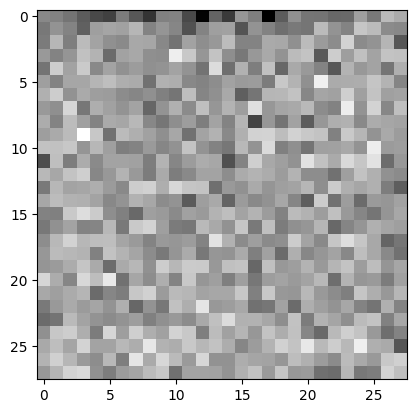

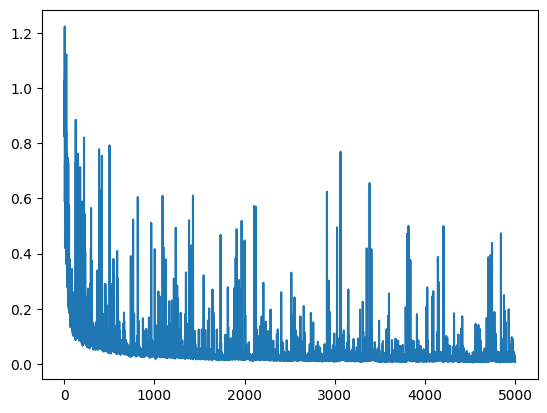

In [8]:
epoch = 5000
loss_steps = []
tq = trange(epoch , leave= False)
model.train()
for e in tq:
    t = torch.randint(0 , 500 ,(1,))
    #t = torch.tensor([e%1000])
    epslion = torch.randn((1,1,28,28))
    diffused_image = process.forward(img , t , epslion)
    out = model(diffused_image.to(device) , t.to(device))
    loss = criterion(epslion.to(device) , out)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_steps.append(loss.item())
    tq.set_description(f"Loss: {loss.item():.4f}")
torch.save(model.state_dict(), "Model_sole_DDPM.pth")
model.eval()
xt = torch.randn((1,1,28,28))
with torch.no_grad():
    for i in trange(500 , -1 , -1):
        t = torch.ones([1]) *ｉ
        et = model(xt.to(device) , t.to(device))
        xt = process.inverse(xt , et.cpu() , i)
for i in range(1):
    plt.tight_layout()
    plt.imshow(xt[i][0], cmap="gray", interpolation="none")
    plt.show()
plt.plot(loss_steps)
plt.show()


